# <font color='#eb3483'> Exploratory Data Analysis </font>


## What is Exploratory Data Analysis?  

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually.   

Plotting in EDA consists of Histograms, Box 
plot, Scatter plot and many more.   

It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

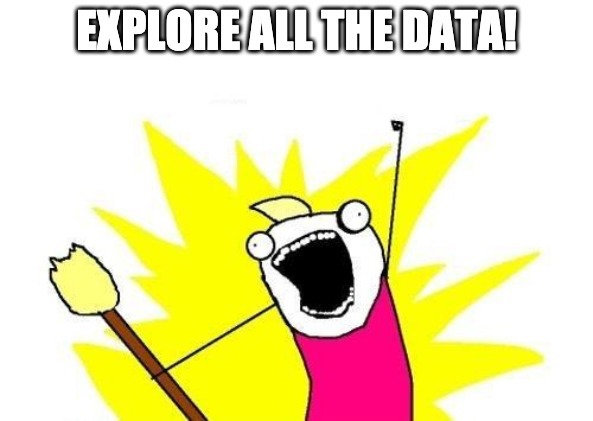

## How to perform Exploratory Data Analysis?  

This is one a question that everyone is keen on knowing the answer to. Well, the answer is it depends on the data set that you are working on. There is no one method or common methods in order to perform EDA. However, there are a few set steps that this generally includes:  

1. Loading and inspecting your data
1. Cleaning the data which includes:  
   2.1. dropping data points and columns we don't need.   
   2.2. checking data types and fixing if needed  
   2.3. removing duplicates  
   2.4. dealing with missing values  
   2.5. looking for outliers and deciding how to deal with these  
   2.6. reformatting columns if needed

1. Some visual exploration to look at relationships between variables or interesting insights that jump out
1. How can you add, change or remove features to get more out of your data? 

# In our notebooks:

In this module we'll be covering classes in:

1. Loading and inspecting your data
1. Cleaning the data which includes:  
   2.1. dropping some columns      
   2.2. removing duplicates     
   2.3. checking data types and fixing if needed       
   2.4. dealing with missing values  
   2.5. looking for outliers and deciding how to deal with these  
1. Cardinality of categorical variables

1. Digging into patterns
1. Pandas profiling



# <font color='#eb3483'> AirBnB New York  </font>




### Background


http://insideairbnb.com/get-the-data.html


What can we say about the prices of air bnbs in New York.   
Are there certain neighbourhoods that are more expensive.   
Do properties with higher ratings charge more?  
Does more rooms mean more money? 

This is a great place to start digging in to these questions or generating hypotheses, with data on the price, neighbourhood, layout and ratings per air bnb rental.

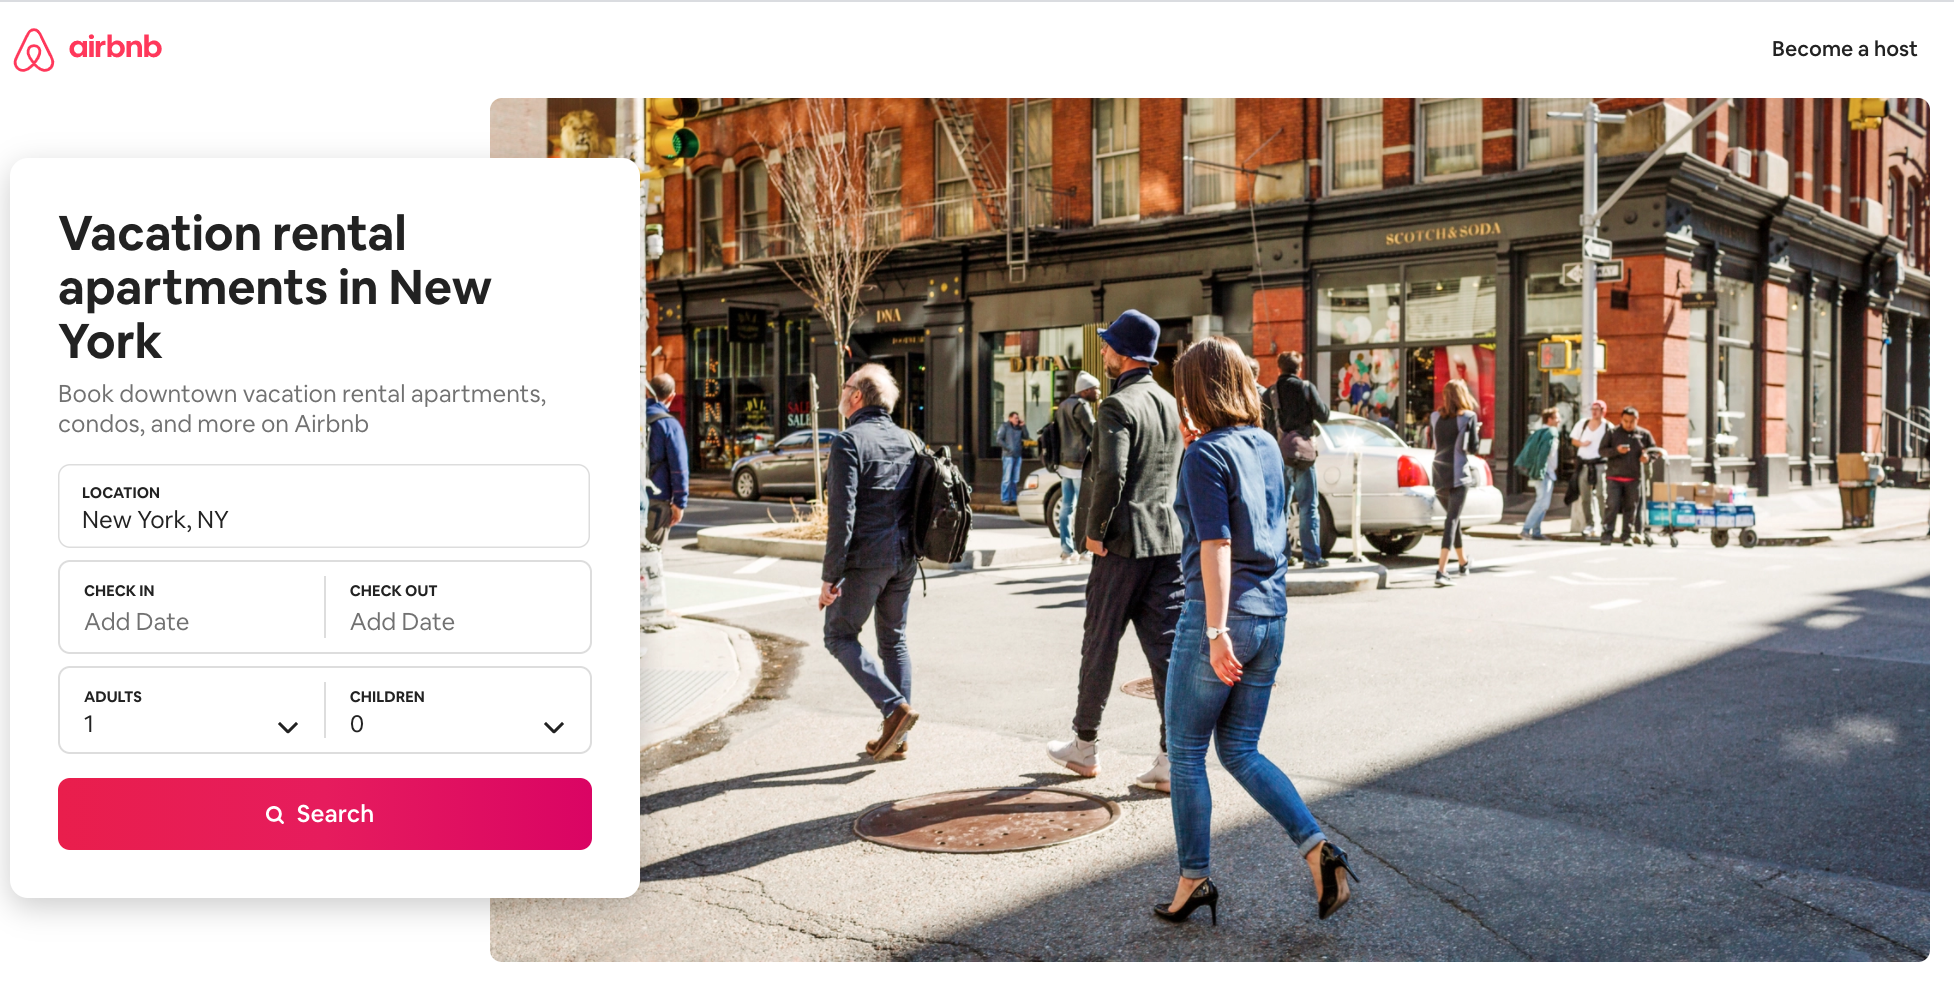

In [ ]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

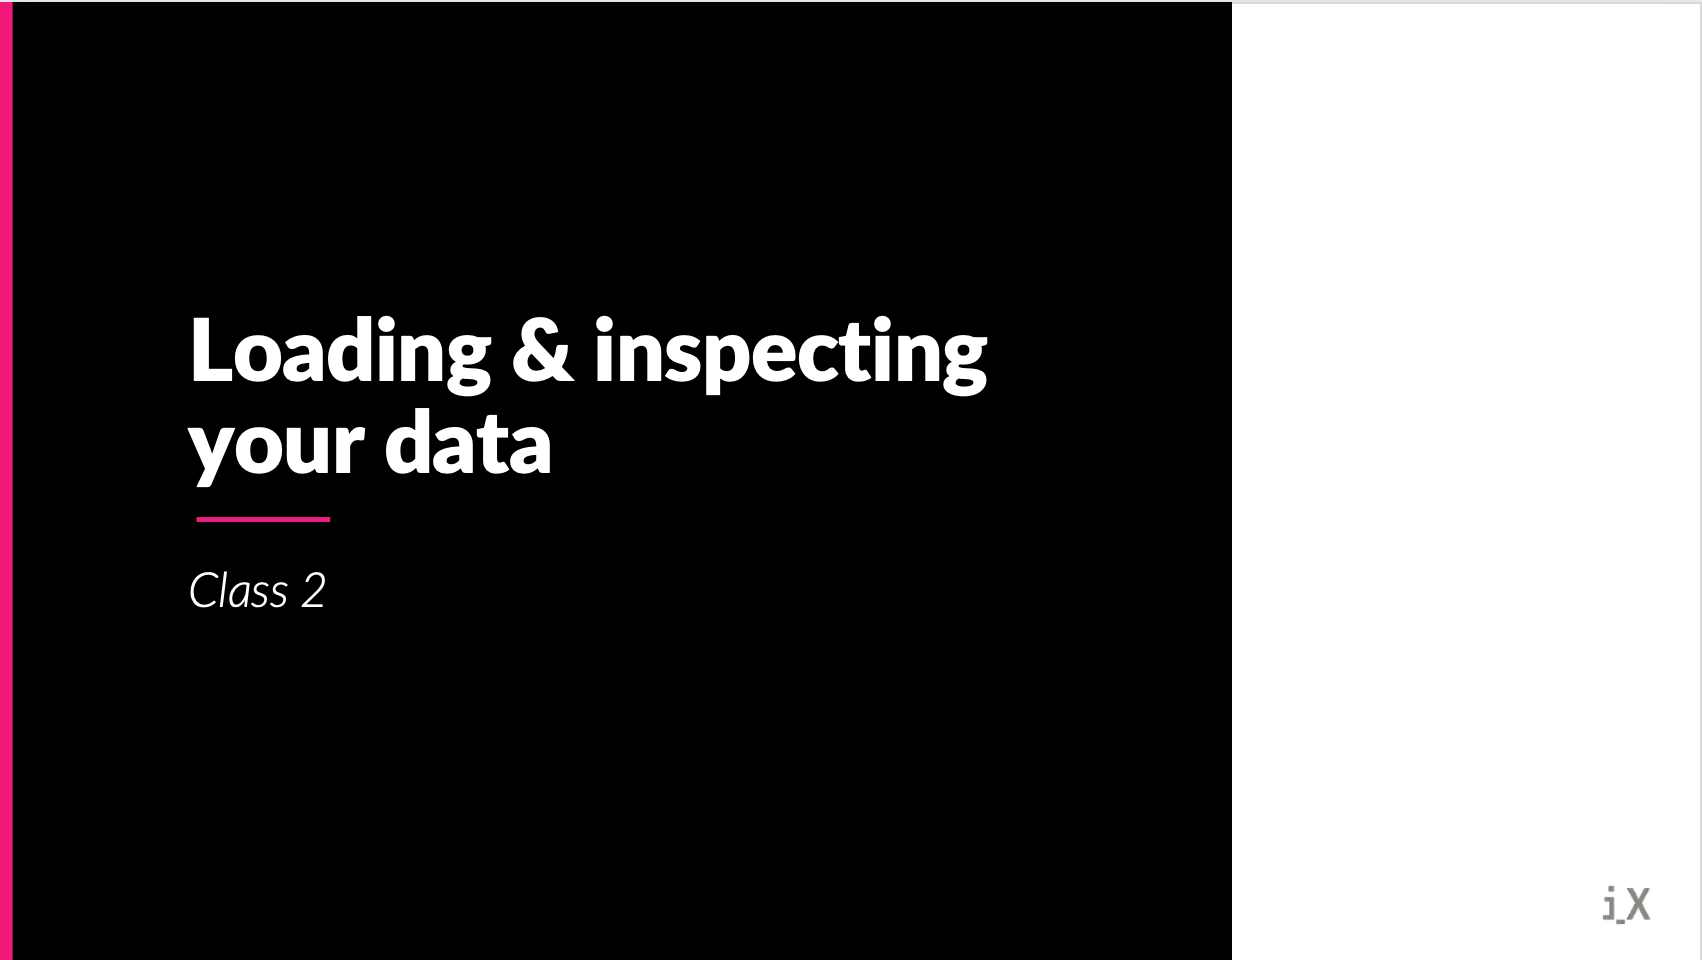

## <font color='#eb3483'> 1. Loading and inspecting your data </font>


In [ ]:
df = pd.read_csv("data/NYairbnb_test.csv")
df.head()

What other commands can we use to have a high level glance at our data frame?

In [ ]:
df.apply('nunique') # this is a useful one

In [ ]:
#what are some interesting insights we can pull out just from the above code?

<hr>

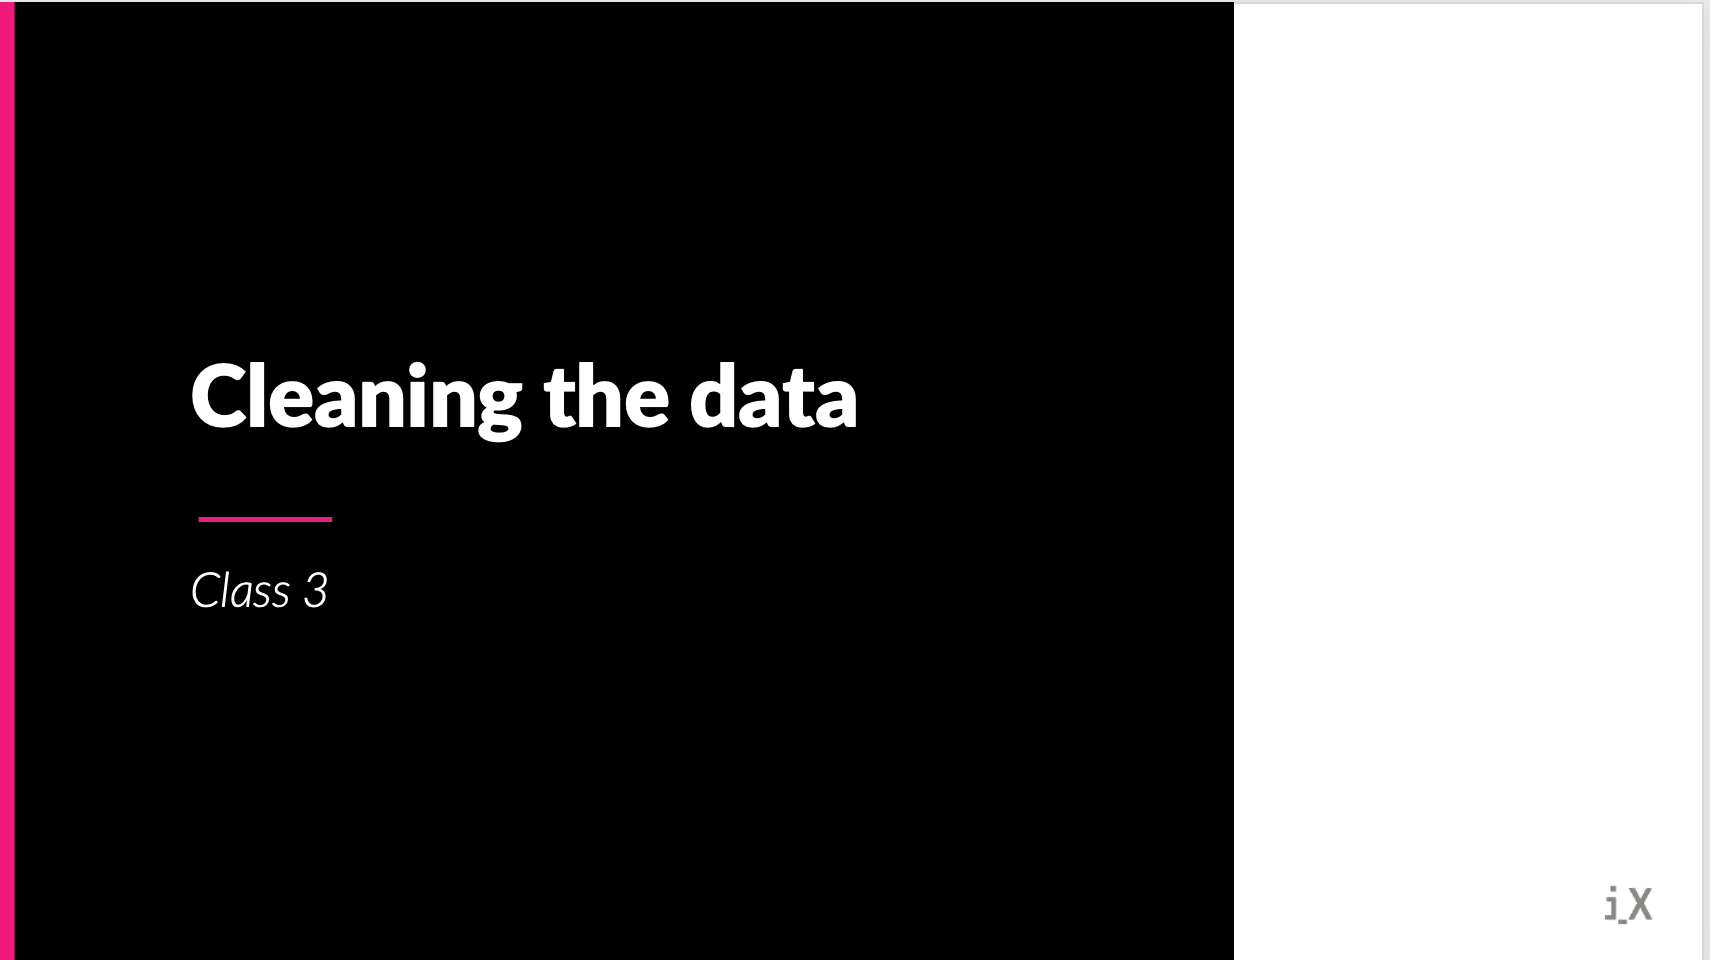

## <font color='#eb3483'> 2. Clean the data </font>

Some (but potentially not all) steps to take in cleaning the data includes:  
   2.1. dropping columns we don't need  
   2.2. removing duplicates  
   2.3. checking data types and fixing if needed  
   2.4. dealing with missing values  
   2.5. looking for outliers and deciding how to deal with these 



<div>
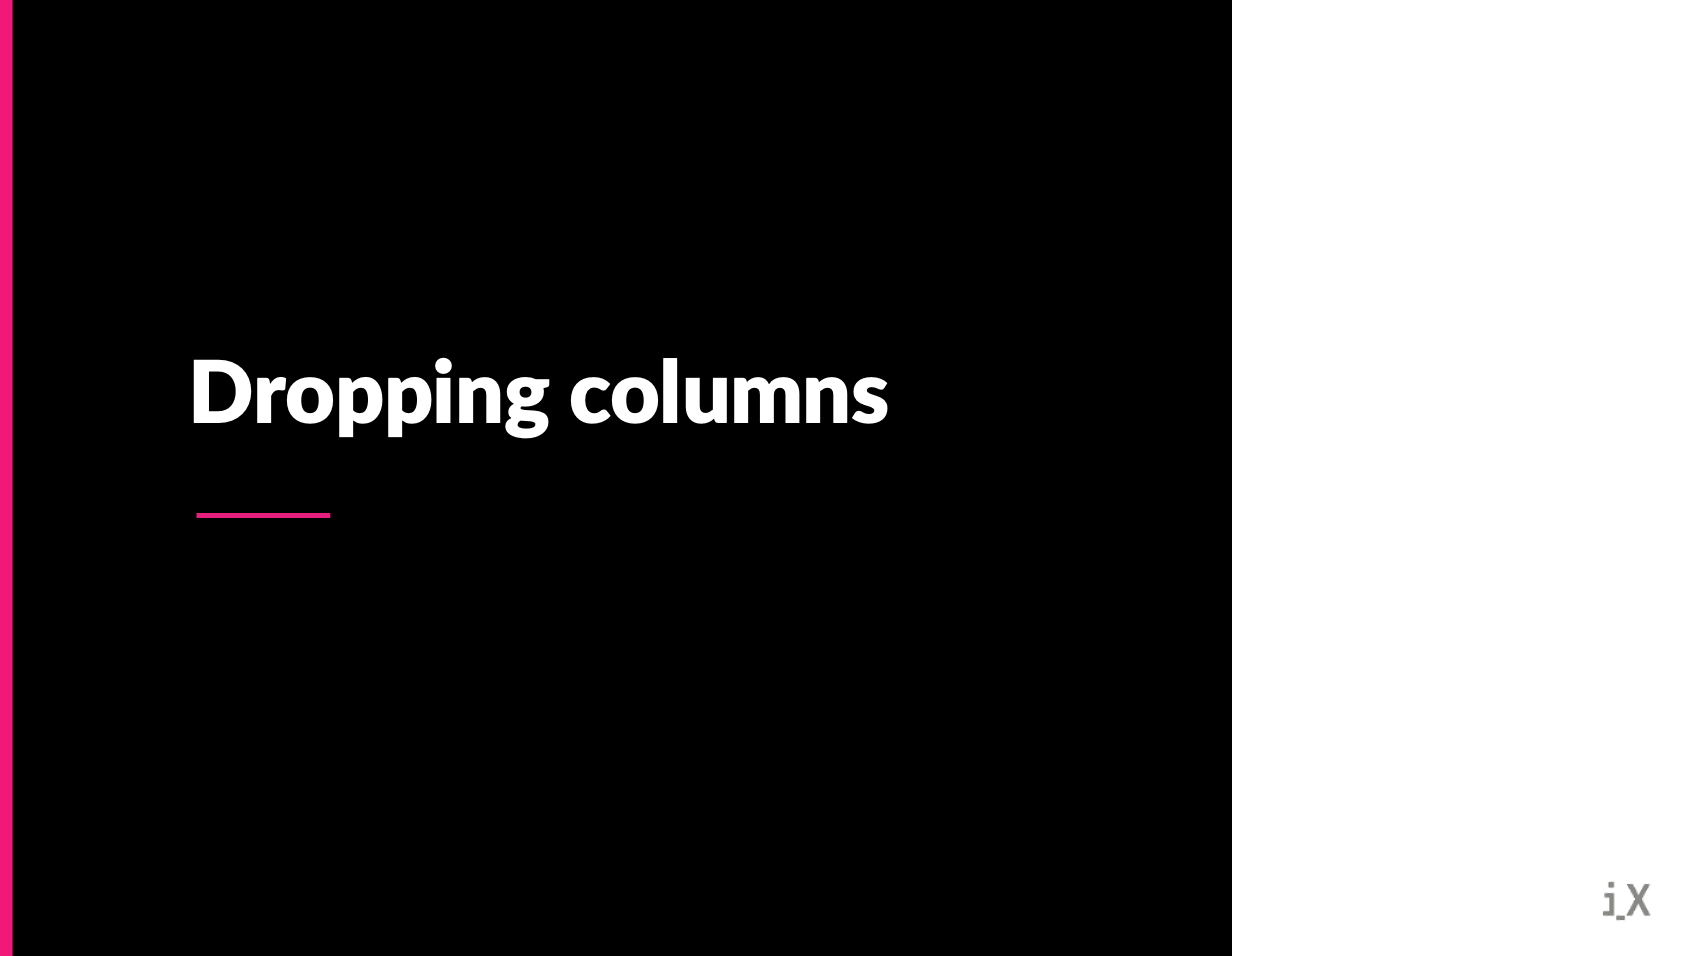
</div>

## <font color='#eb3483'> 2.1. Drop columns we dont need </font>


In [ ]:
# removing uneeded columns - lets have a browse through see what we can probably remove
df.head()
#df.columns

#use unique command to check out whats in a column if needed

# list them 


In [ ]:
df.neighbourhood_group.unique()

In [ ]:
# First step is to clean the data and see which are the redundant or unnecessary cols
# drop the columns we listed above that we dont want. 



In [ ]:
# do we waant to rename any columns?
# lets rename review_scores_rating to review_rating


<div>
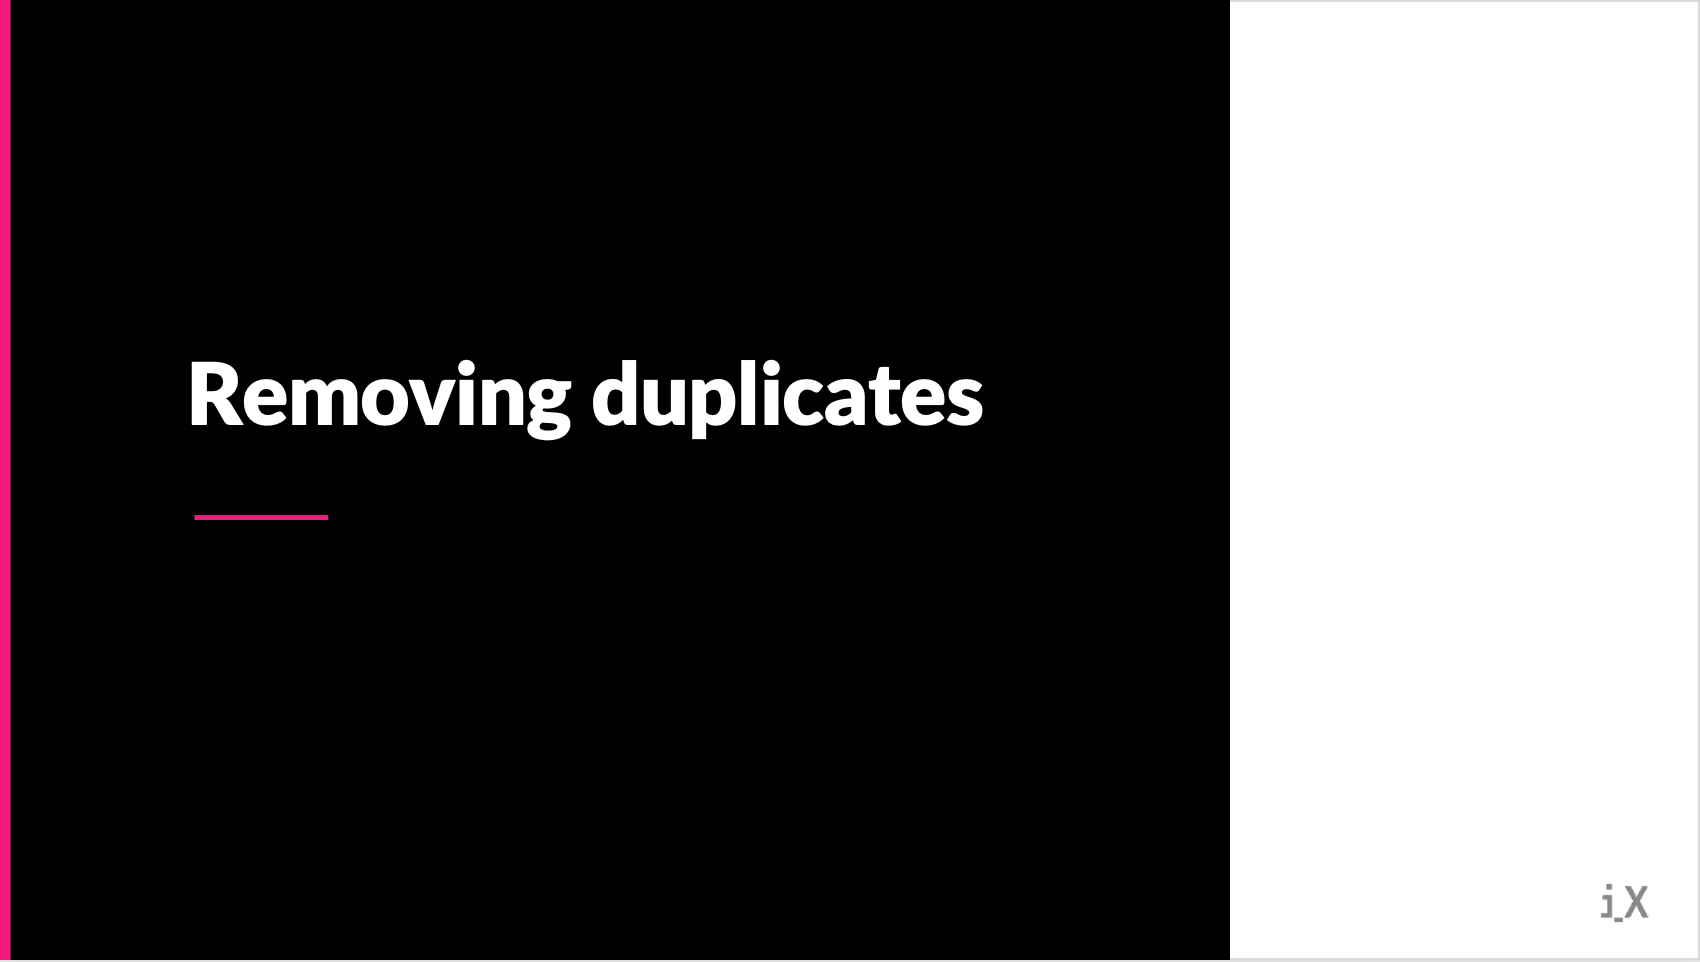
</div>

## <font color='#eb3483'> 2.2. Removing duplicates </font>


In [ ]:
#Let's look for duplicate rows

print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)


In [ ]:
# whoooops! not cool - let's remove them.
df = df.drop_duplicates(keep='first')

print(df.shape)

<div>
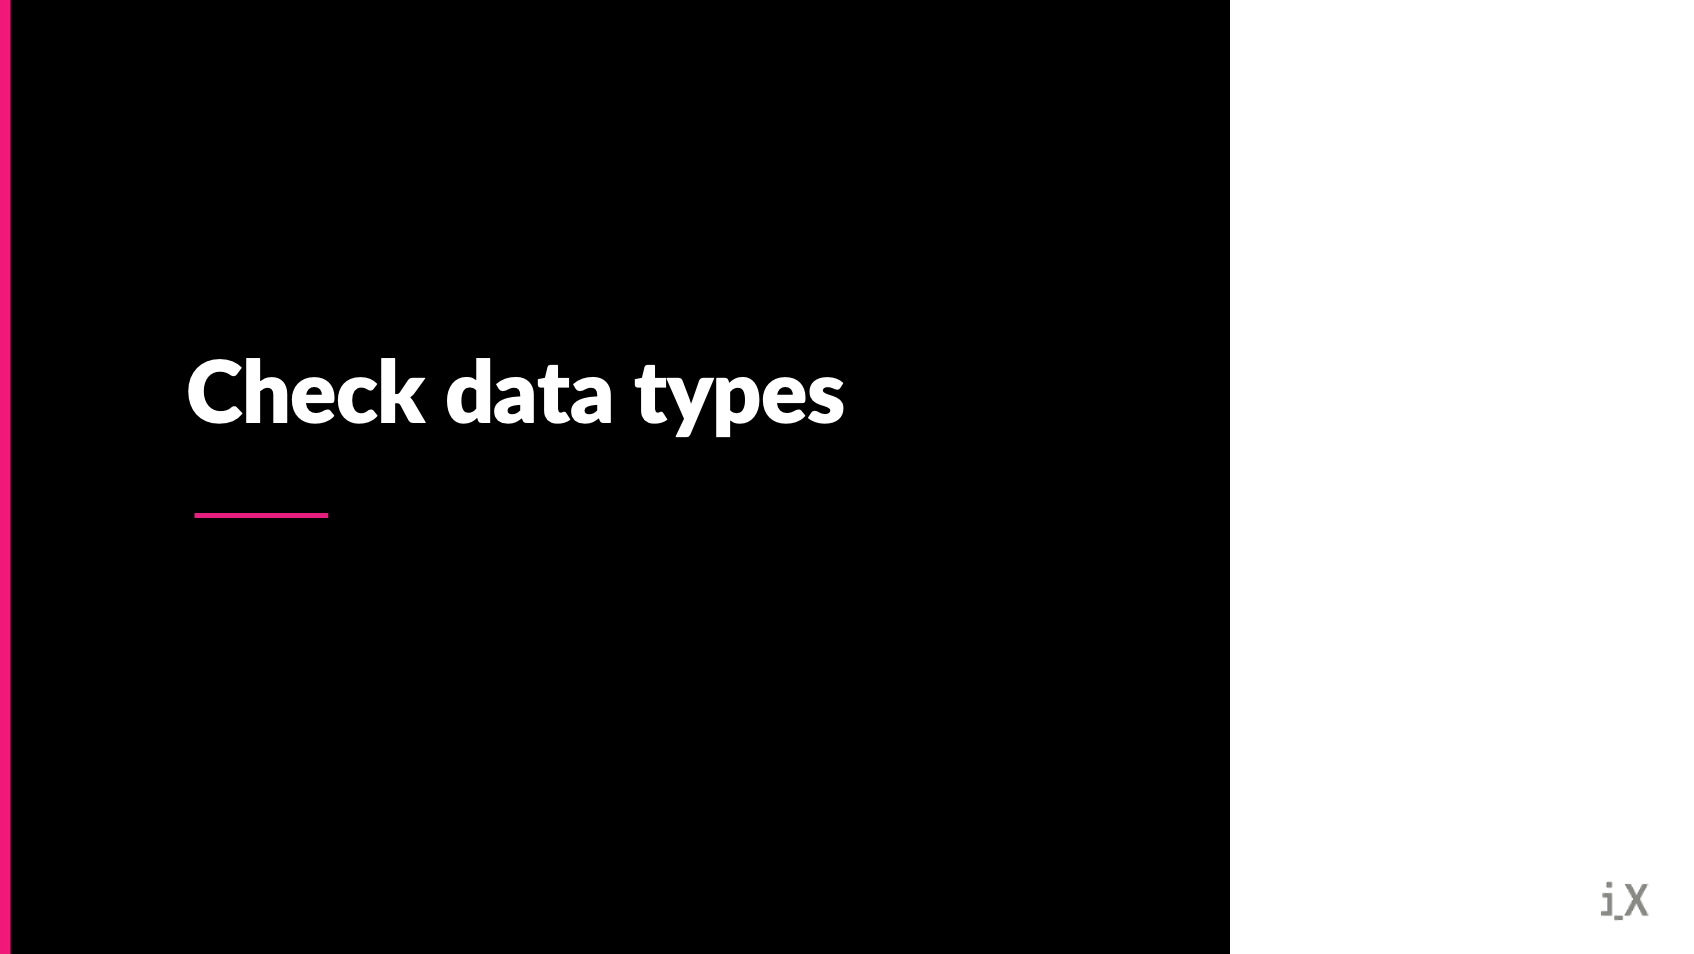
</div>

## <font color='#eb3483'> 2.3. Check data types </font>


In [ ]:
#lets have a quick look at our data types


In [ ]:
#Any issues here?

In [ ]:
# How about changing the last_review to DateTime column. - Hint you can use the function 'to_datetime'


In [ ]:
#lets change host ID to an object. isnt really a number - its a category
# cant remember how - google is your friend.




In [ ]:
# check changes are as desired
df.dtypes

<div>
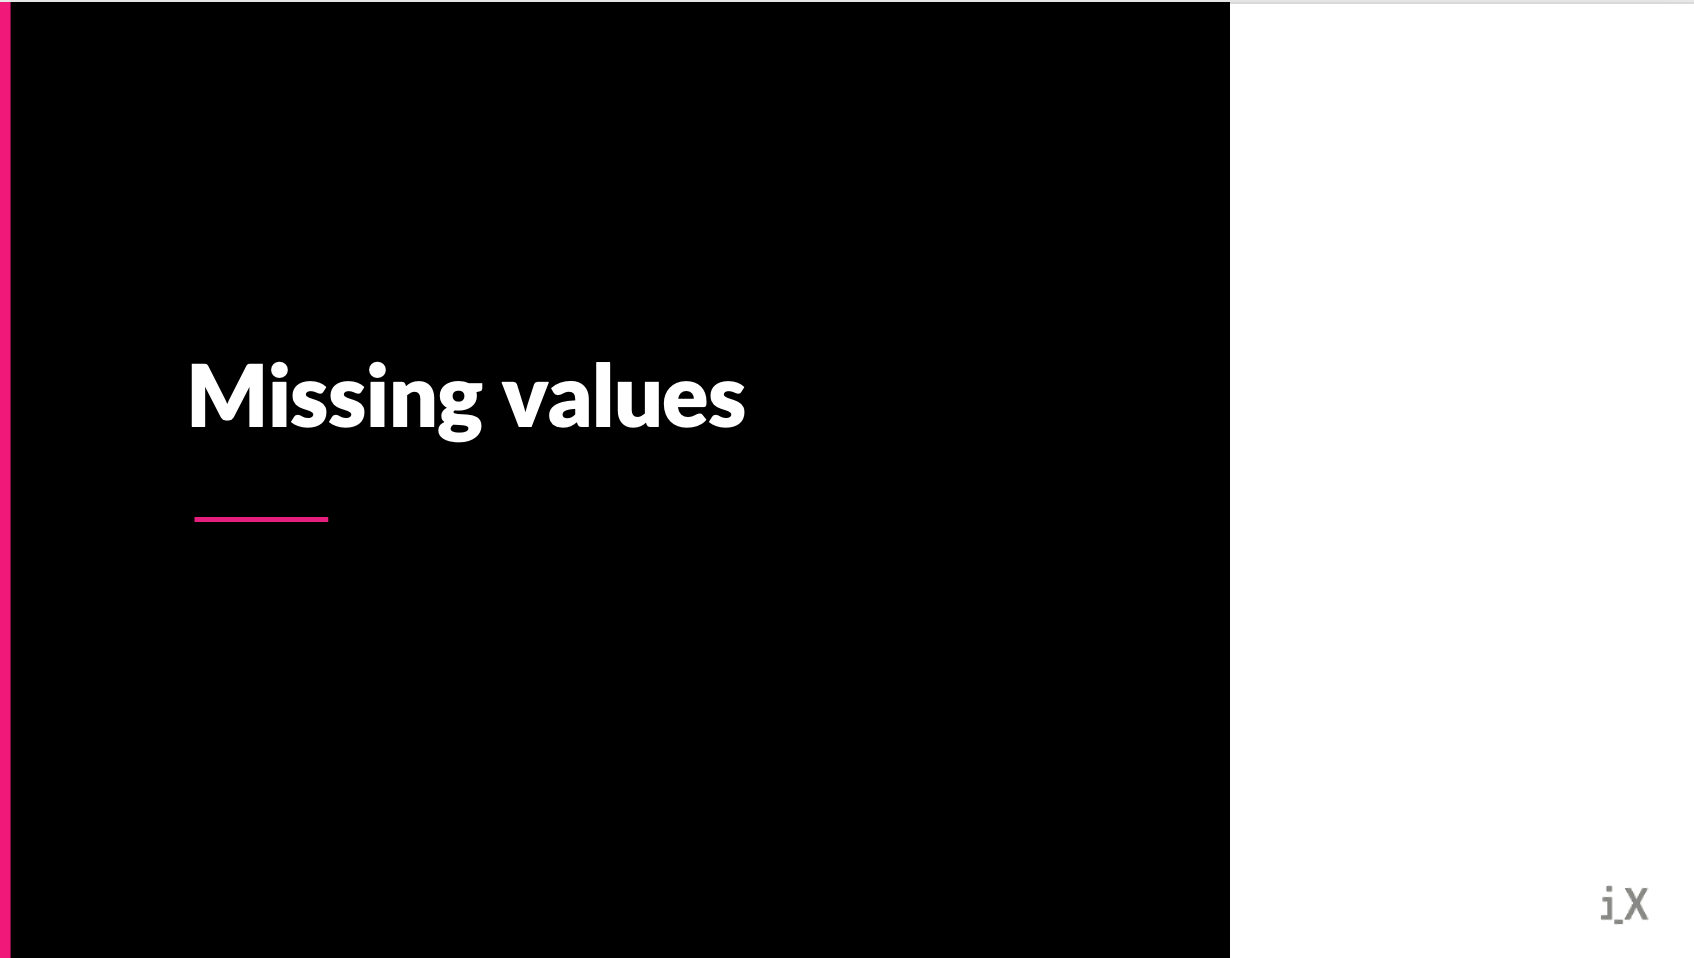
</div>

## <font color='#eb3483'> 2.4. Missing values </font>


In [ ]:
print(df.isnull().sum())

### <font color='#eb3483'>Missigno </font>
This package let's us view how our missing data is spread out across rows and columns in a super convenient visual format (package found here: https://github.com/ResidentMario/missingno)

You can install this package by using `pip install missingno`.

In [ ]:
#pip install missingno

In [ ]:
import missingno as msno

msno.matrix(df);

In [ ]:
# what do we see here. 

# drop any columns you might need ... but be careful :)


What CAN one do about missing values ... 
1. Remove those records with missing values  
`df = df.dropna()`   
or  
`df = df.dropna(subset=["column2", "column5", "this_column", "that_column"])`  


2. Replace the null values with a particular value, for example 0 or "missing". It is a simple technique but adds noise (because it assumes the null values are one specific case).  
`df["column1"] = df.column1.fillna("missing")`  
`df["this_column"] = df.this_columns.fillna(0)`  


3. Data Imputation: We can replace the missing values with a particular value, but use some criteria to choose that value. Common imputation practices are imputing with the mean, mode or median.

In [ ]:
#EXAMPLE:
# impute missing values for availability using mean.
availability_365_mean = df.availability_365.mean()

df.availability_365 = df.availability_365.fillna(availability_365_mean)


There are other techniques to deal with missing values:

- Use a predictive model to predict the missing values.

- More sophisticated methods: [MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) is a method that deals with missing values, and in this [repository](https://github.com/hammerlab/fancyimpute) there are more methods

[Here](https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1) there are more strategies

<div>
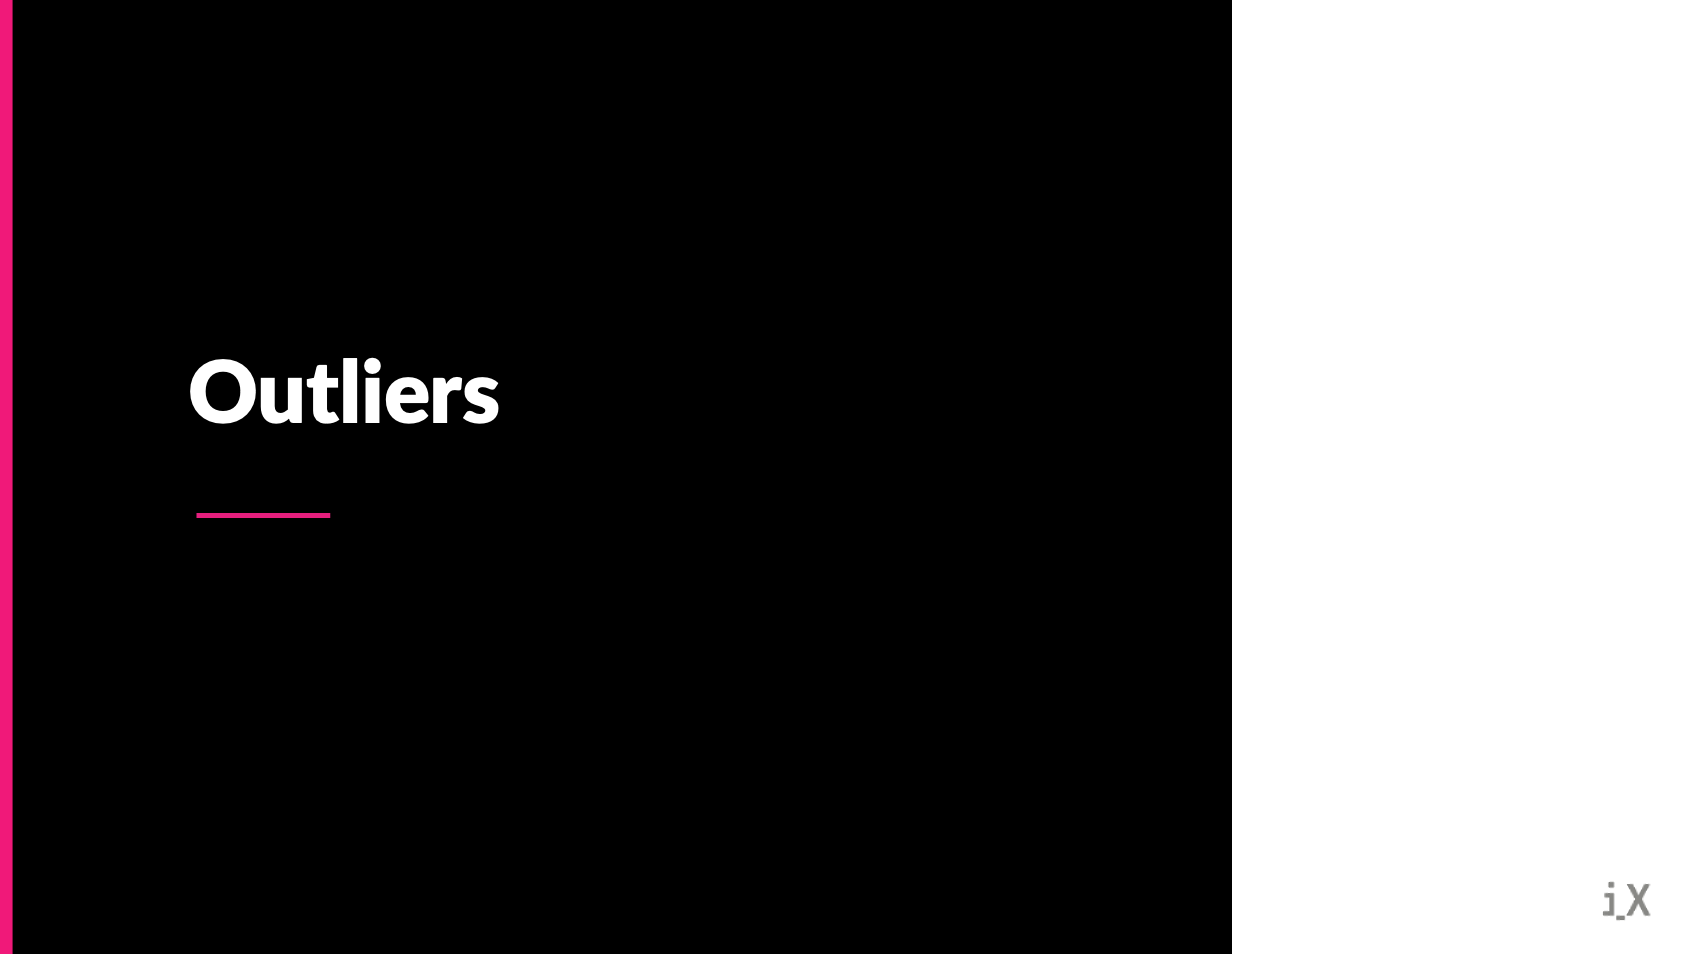
</div>

## <font color='#eb3483'> 2.5. Looking for and dealing with outliers </font>


In [ ]:
df.describe()

In [ ]:
#make a histogram for accommodates using sns


In [ ]:
#make a boxplot for accommodates using sns


In [ ]:
# lets check out the unique values (always useful)
np.sort(df.accommodates.unique())

In [ ]:
# hmmmmm, 40 looks quite high. lets check this out ... is this a true outlier?
# Pull out values > 20 and have a look see wht you think


In [ ]:
#lets fix this - 


In [ ]:
# Try it yourself ... 
# Check out bedrooms in the same way.

In [ ]:
# Let's check out price in the same way.
df.price.describe()

In [ ]:
# get a distribution plot (histogram)


In [ ]:
#get boxplot


In [ ]:
# Let's deal with some price issues
#check out shape to remind yourself
#Remove rows with price greater 20000USD (hint you can do this by retaining anything under)



### IMPORTANT Remember - to include assumptions and steps you took about outliers in your notes at the end of your notebook

In [ ]:
# check shape again

In [ ]:
#now replot boxblot of price

In [ ]:
# what if we HAD LOTS OF VARIABLES and wanted to look at all the numerical values at once. 
numerical = [
  'accommodates', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_rating'
]

#could also pull out columns based on dtype
#numerical = df.select_dtypes(include=np.number) # different way of doing the above. 


In [ ]:
df[numerical].hist(bins=15, figsize=(15, 8), layout=(3, 4));


In [ ]:
#Hmmm whats going on with bedrooms?

EXERCISE: Take 10-15 minutes and investigate cleaning fee, number of reviews, bedrooms, batherooms, beds and review scores rating and see whether you think there might be any outliers in there. 

<hr>

In general, extreme values are those values that are different than the variable distribution, and estimating summary statistics for a column with outliers yields unreliable results.

One common practice is to consider outliers those values with a z score higher than 3 (that means, they are 3 standard deviations   bigger or smaller than the mean.

z score is defined as:

$$z(x)= \frac{x-\mu}{\sigma}$$

So you can always double check whether values fall above this for potential extreme outliers.

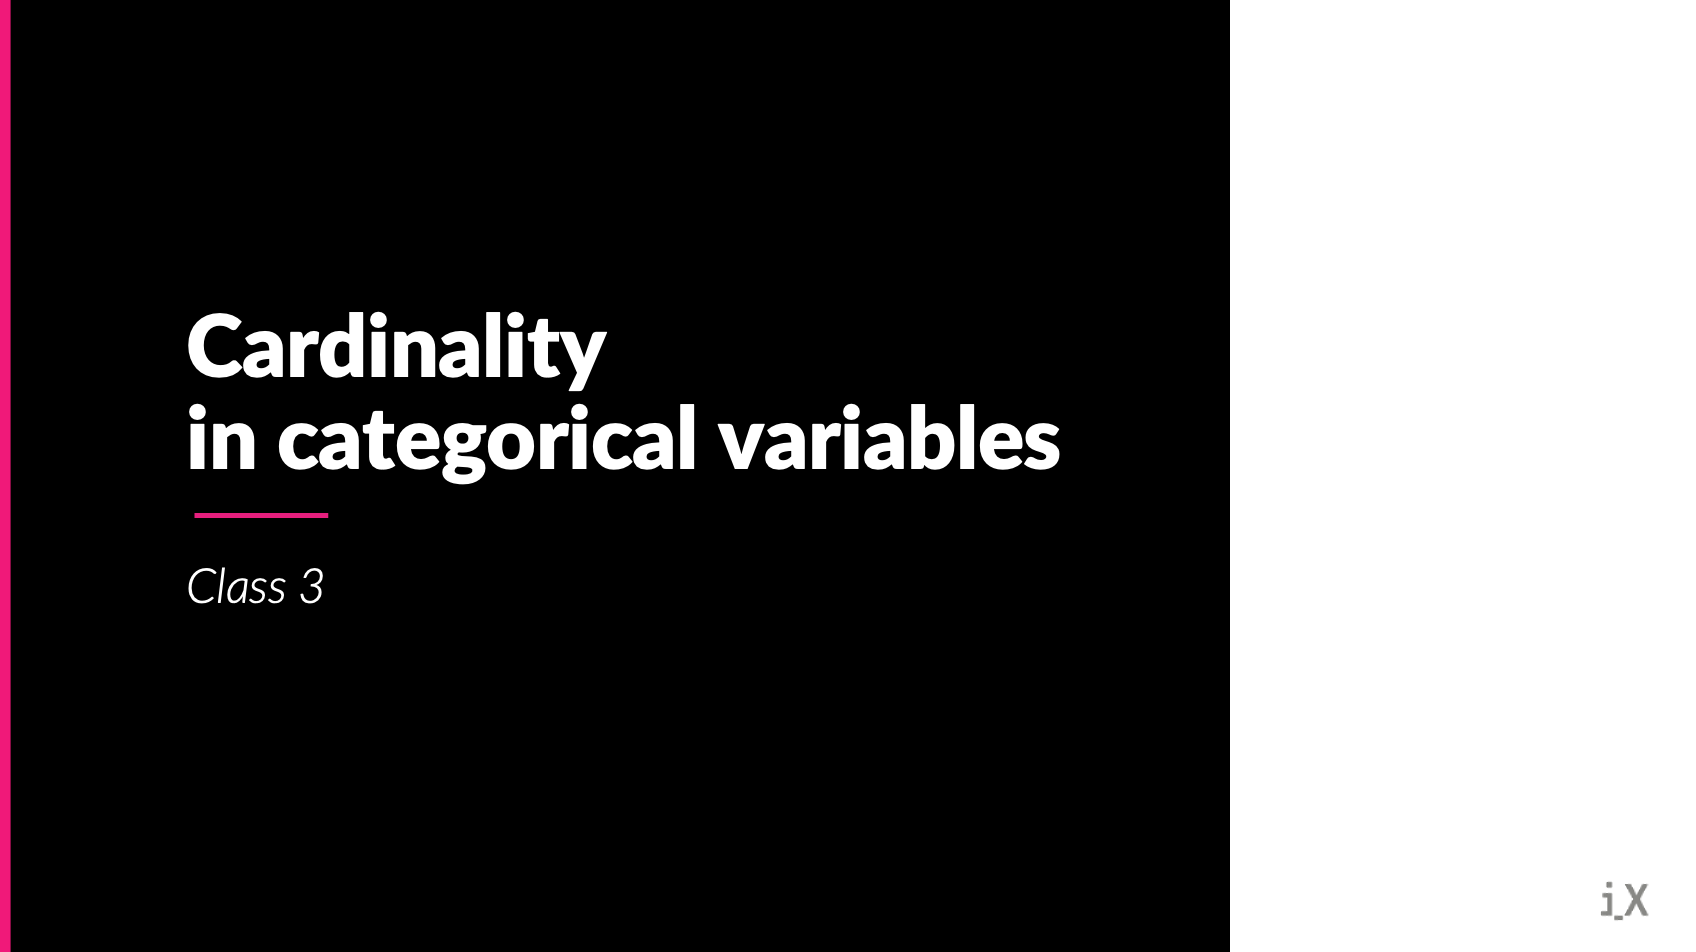

## <font color='#eb3483'> 3. Cardinality: Assessing categorical variables </font>


It is good practice to look at the categorical variables to get an idea of the cardinality - and how useful they might be in groupings or as summarising varaibles. 


High cardinality =  variables with few repeated values (ie all different)    
Low cardinality = many repeated values (ie almost all one type)



In [ ]:
#remind yourself of data types
df.dtypes

In [ ]:
df.neighbourhood.unique()

In [ ]:
df.neighbourhood_group.unique()

In [ ]:
sns.countplot(y = df['neighbourhood_group']);


In [ ]:
#Or we can view this as a ratio
df.neighbourhood_group.value_counts(normalize=True).plot.barh(); # as a ratio


<hr>

In [ ]:
#When would cardinality not be informative for a categorical variable?

So what can we summarize from our above steps?

### <font color='#eb3483'> Data Dictionary <font color='#eb3483'>

It is important to write down the description and datatypes of the variables.
(in our case it's pretty self explnatory but you may have done some major transformations and its good to try and keep track of them)  - especially for when sharing notebooks (think internships) or coming back to it months later.

* id            --                     int64  
* host_id         --                categorical  
* host_since       --               date 
* neighbourhood      --             categorical  
* city        --                    categorical  
* zipcode      --                   categorical  
* latitude      --                 float64  
* longitude     --                 float64  
* property_type       --            categorical  
* room_type           --            categorical  
* accommodates        --             int64  
* bathrooms           --           float64  
* bedrooms             --          float64  
* beds                 --          float64  
* bed_type             --           categorical  
* price                --            int64  
* number_of_reviews    --            int64  
* review_scores_rating  --         float64  




### <font color='#eb3483'> Data processing steps </font>
- There are xxx duplicate rows (we have removed them)
- The variables `xxx, xxx, xxx and xxx` have missing values - what did we do with these?
- The categorical variable `xxx, xxx` has a dominant class (65% of xxx are xxx, etc)
- There are outliers in the variables `xxx and xxx` - what did we do with these?


### <font color='#eb3483'> Variable Exploration Description <font color='#eb3483'>
(Distributions & Cardinality)  
Here we describe the possible entities(groupings) that we can break our dataset into, this will help us think of different ways to slice and group the dataset in further steps.

- 4 neighbourhood _groups
- 38 neighbourhoods
- Room_type -> hotels were the most frequent room type
- Accommodates - > good range of sizes of properties.


### <font color='#eb3483'>  Saving our data </font>
After each step it is important to save the dataset with a different name (so we dont modify the original).

In [ ]:
df.to_csv("data/ny_airbnb_processed.csv", index=False)

<hr>

### <font color='#eb3483'>An extra tit-bit: Pickling </font>


We usually export our datasets to csv, because it is a format that is easily readable in pretty much any platform.

However, CSV (`Comma Separated Values`) is a simple format, and when we export a dataframe to csv some of the information gets lost in translation, as categories will turn into text. 

One way to avoid this is to save the dataframe into a native python format `pickle`. Saving a dataframe as a pickle file has two main advantages. One is that reading the dataframe is much faster, because python can read the file from the hard drive as a dataframe directly (pandas doesnt have to read a text file and convert it into a dataframe). The second advantage is that we keep all of the original column dtypes.

Pandas can read and write pickle files very easily (`read_pickle` and `to_pickle`).

In [ ]:
df.to_pickle("data/ny_airbnb_processed.pkl")